# Instalações necessárias

In [1]:
%%capture
!pip install geopandas

In [2]:
%%capture
!pip install mapclassify

# Bibliotecas necessárias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point, Polygon

from sklearn.linear_model import LinearRegression

# from scipy import stats
import statsmodels.api as sm

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

In [4]:
# caminho do google drive para leitura de dados
path = '/content/drive/MyDrive/AGRO/data_new/'

# Análise da série resposta



In [5]:
# dados de rendimento (produtividade)
rend = pd.read_csv(path+'rendimento.csv', sep = ';', encoding = "ISO-8859-1")
rend.head()

,nivel,codigo_ibge,name,MEDIA,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,MU,4101051,Anahy,3354,3190,2851,2600,3360,3150,3099,...,2705,3400,3698,3709,4091,3644,3644,3471,3619,3217
1,MU,4102000,Assis Chateaubriand,2906,2200,2600,2065,2968,3100,998,...,1401,3493,3203,3295,3420,3967,3480,2200,3700,3250
2,MU,4103057,Boa Vista da Aparecida,3384,2750,2700,2231,3260,3300,3471,...,2500,3932,3449,3577,3687,3700,3667,3500,4452,3571
3,MU,4103354,Braganey,3274,2700,2644,2234,3189,3215,2709,...,2907,3383,3704,3705,3826,3850,3347,3600,3719,3390
4,MU,4103453,Cafelândia,3413,2663,2650,2593,3148,3469,2747,...,2973,3853,3826,4008,3434,4515,3700,3421,4215,3460


In [6]:
# dados de produção bruta
prod = pd.read_csv(path+'producao.csv', sep = ';', encoding = "ISO-8859-1")
prod.head()

,nivel,codigo_ibge,Localidade,MEDIA,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,MU,4101051,Anahy,17647,16365,11404,12480,16464,16380,16407,...,12902,15742,18675,18640,25976,18950,18541,18792,26708,17000
1,MU,4102000,Assis Chateaubriand,203233,158508,187720,144206,196650,214847,68740,...,97900,238240,221314,229684,238519,276500,243948,155870,263181,233691
2,MU,4103057,Boa Vista da Aparecida,13428,6875,6480,5801,8410,8250,9025,...,8000,14392,18486,19278,20020,19869,22000,17255,22350,15000
3,MU,4103354,Braganey,58484,44550,47600,36310,53034,53362,45371,...,48946,58093,70422,70423,73838,67375,57853,69228,71591,60000
4,MU,4103453,Cafelândia,76915,58200,57638,49390,71900,71292,59812,...,65175,80215,86343,92189,80041,102987,85507,80565,98968,81379


In [7]:
# guardando os nomes dos municípios
municipios = rend['name'].values
# guardando os códigos IBGE dos municípios
codigos = prod[prod['Localidade'].isin(municipios)]['codigo_ibge'].values
# geo DataFrame com latitude e longitude dos municípios
position = pd.read_csv(path+'latlong.csv', sep = ',')
# criando um "geoDataFrame" com as coordenadas
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(position['longitude'], 
                                    position['latitude'])]
geo_df = gpd.GeoDataFrame(position, 
                          crs = crs, 
                          geometry = geometry)
# mapa do Paraná com limites de municípios
mapa_pr = gpd.read_file('/content/drive/MyDrive/AGRO/shapefiles/PR_Municipios_2021.shp')
# selecionando apenas os municípios da região oeste
oeste_pr = mapa_pr[mapa_pr['NM_MUN'].isin(municipios)] 
# adicionando a produção média ao geoDataFrame
oeste_pr['PROD_MEDIA'] = prod['MEDIA'].values/1000         
# adicionando o rendimento médio ao geoDataFrame
oeste_pr['REND_MEDIA'] = rend['MEDIA'].values

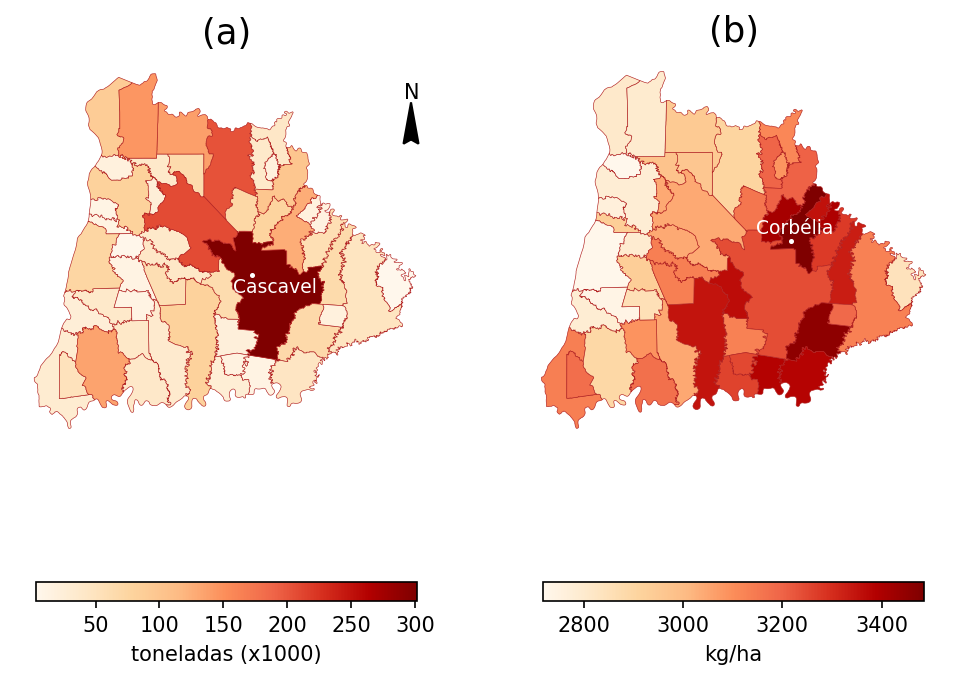

In [8]:
# mapas de produção e produtividade média (Figura 4)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,8), dpi = 150)

oeste_pr.plot(ax = ax[0], column = 'PROD_MEDIA', legend = True,
              legend_kwds = {'label': 'toneladas (x1000)', 
                             'orientation': 'horizontal',
                             'shrink':0.9},
              cmap = 'OrRd', edgecolor = 'firebrick', linewidth = 0.3)
geo_df[geo_df['nome']=='Cascavel'].plot(ax = ax[0], 
                                        markersize = 2, color = 'white')
ax[0].annotate('Cascavel', xy = (-53.459,-24.9573), xytext=(11, -8), 
               textcoords='offset points', ha='center', 
               fontsize = 9, color = 'white')
ax[0].axis("off")
ax[0].set_title('(a)', fontsize = 17)
ax[0].text(x=-52.65, y=-24.1, s='N', fontsize=10)
ax[0].arrow(-52.61, -24.3, 0, 0.18, length_includes_head=True,
          head_width=0.08, head_length=0.2, overhang=.1, facecolor='k')

oeste_pr.plot(ax = ax[1], column = 'REND_MEDIA', legend = True,
              legend_kwds = {'label': 'kg/ha', 
                             'orientation': 'horizontal',
                             'shrink':0.9},
              cmap = 'OrRd', edgecolor = 'firebrick', linewidth = 0.3)
geo_df[geo_df['nome']=='Corbélia'].plot(ax = ax[1],
                                        markersize = 2, color = 'white')
ax[1].annotate('Corbélia', xy = (-53.3006,-24.7971), xytext=(2, 4), 
               textcoords='offset points', ha='center',
               fontsize = 9, color = 'white')
ax[1].axis("off")
ax[1].set_title('(b)', fontsize = 17)
plt.show()
#fig.savefig('prodrend.png')

In [9]:
# Municípios top 10 em produtividade/rendimento
top10 = rend.sort_values(['MEDIA'],ascending = False).head(10)['name'].values

# criando um DF auxiliar
s_rend = pd.DataFrame(index = rend.columns[4:], columns = top10)
for i in top10:
  s_rend[i] = rend[rend['name']==i].drop(['nivel','codigo_ibge','name','MEDIA'],
                                         axis = 1).iloc[0].values

# adicionando a média de todos os 50 municípios
s_rend['Média']= rend.drop(['nivel','codigo_ibge','name','MEDIA'], 
                           axis = 1).mean(axis = 0)

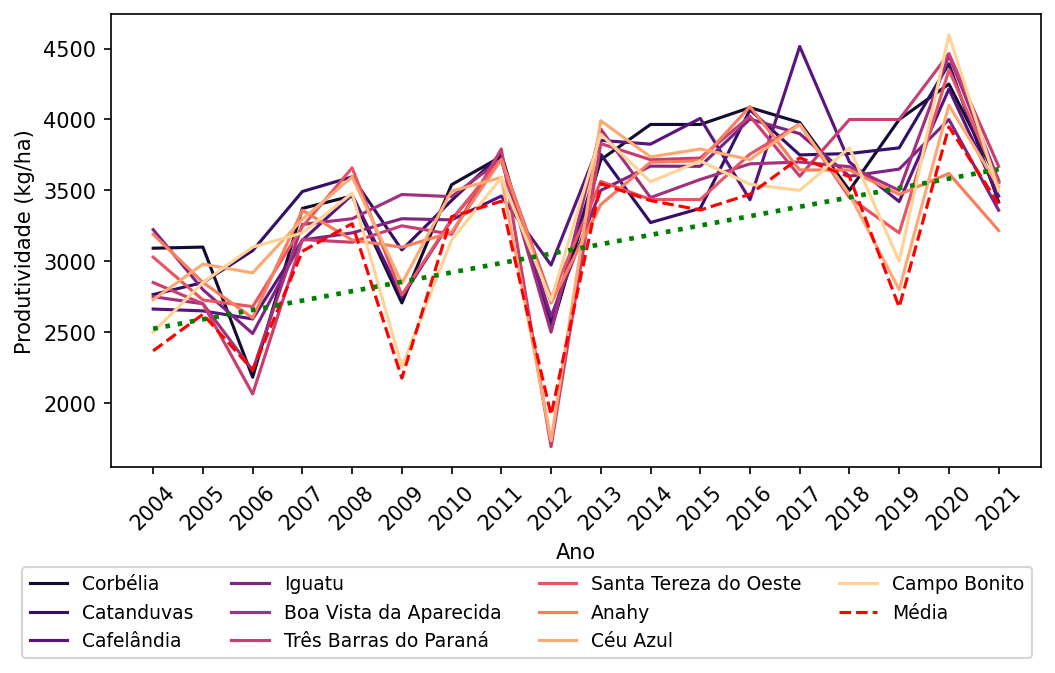

In [10]:
# criando uma paleta de cores (Figura 11)
import itertools
palette = itertools.cycle(sns.color_palette('magma', 10))

# gráfico dos municípios top 10 em rendimento
fig, ax = plt.subplots(figsize = (8,4), dpi = 150)

for i in top10:
  c = next(palette)
  sns.lineplot(ax = ax, x = np.arange(2004,2022), y = s_rend[i], color = c)

sns.lineplot(ax = ax, x=np.arange(2004,2022), y = s_rend['Média'], 
             linestyle = '--', color = 'red')
sns.regplot(x=np.arange(2004,2022), y=s_rend['Média'].values, ci=None, 
            scatter = False, 
            line_kws={'color': 'green', 'linestyle': 'dotted'})
ax.set_xlabel('Ano', fontsize = 10)
ax.set_ylabel('Produtividade (kg/ha)', fontsize = 10)
ax.legend(s_rend.columns, bbox_to_anchor = (1, -0.2), fontsize = 9, ncol = 4)
plt.xticks(np.arange(2004, 2022, 1.0))
plt.xticks(rotation=45)
plt.show()
#fig.savefig('top10.png',bbox_inches='tight')

# Remoção da tendência das séries de produtividade

In [11]:
def rend_city(base, nome):
  '''
  função que retorna a produtividade histórica dado o nome do município 
  e a base de dados
  '''
  return base[base['name'] == nome].drop(['nivel','codigo_ibge','name','MEDIA'],
                                         axis = 1).iloc[0].values
 
def remove_tend(base, nome):
  '''
  função para remover a tendência da produtividade dado o nome do municipio
  e a base de dados
  '''
  ys = rend_city(base, nome)
  ys = ys.reshape(len(ys), 1)
  xs = np.arange(2004,2022)
  xs = xs.reshape(len(xs), 1)
  lrc = LinearRegression()
  model = lrc.fit(xs, ys)
  pred = model.predict(xs)
  return ys - (pred.reshape(len(pred),1) - pred[0])

In [12]:
# criando uma nova base de produtividade livre de tendência
rend_new = rend.copy()

for i in range(50):
  rend_new.loc[i, rend_new.columns[4:]] = remove_tend(rend, 
                                                      municipios[i]).reshape(-1)

# update da produtividade média
medias = []
for i in range(50):
  medias.append(rend_new.loc[i, rend_new.columns[4:]].mean())

rend_new['MEDIA'] = medias
rend_new.head()

,nivel,codigo_ibge,name,MEDIA,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,MU,4101051,Anahy,2994.532164,3190,2808.716202,2515.432405,3233.148607,2980.864809,2887.581011,...,2366.729618,3019.445820,3275.162023,3243.878225,3583.594427,3094.310630,3052.026832,2836.743034,2942.459236,2498.175439
1,MU,4102000,Assis Chateaubriand,2322.842105,2200,2531.432405,1927.864809,2762.297214,2825.729618,655.162023,...,852.459236,2875.891641,2517.324045,2540.756450,2597.188854,3075.621259,2520.053664,1171.486068,2602.918473,2084.350877
2,MU,4103057,Boa Vista da Aparecida,2791.847953,2750,2630.282766,2091.565531,3050.848297,3021.131063,3122.413829,...,1942.262126,3304.544892,2751.827657,2810.110423,2850.393189,2793.675955,2690.958720,2454.241486,3336.524252,2385.807018
3,MU,4103354,Braganey,2710.526316,2700,2577.728586,2101.457172,2990.185759,2949.914345,2377.642931,...,2376.828689,2786.557276,3041.285862,2976.014448,3030.743034,2988.471620,2419.200206,2605.928793,2658.657379,2263.385965
4,MU,4103453,Cafelândia,2766.637427,2663,2574.003096,2441.006192,2920.009288,3165.012384,2367.015480,...,2365.024768,3169.027864,3066.030960,3172.034056,2522.037152,3527.040248,2636.043344,2281.046440,2999.049536,2168.052632


In [13]:
# checando a integridade dos dados
rend_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nivel        50 non-null     object 
 1   codigo_ibge  50 non-null     int64  
 2   name         50 non-null     object 
 3   MEDIA        50 non-null     float64
 4   2004         50 non-null     int64  
 5   2005         50 non-null     float64
 6   2006         50 non-null     float64
 7   2007         50 non-null     float64
 8   2008         50 non-null     float64
 9   2009         50 non-null     float64
 10  2010         50 non-null     float64
 11  2011         50 non-null     float64
 12  2012         50 non-null     float64
 13  2013         50 non-null     float64
 14  2014         50 non-null     float64
 15  2015         50 non-null     float64
 16  2016         50 non-null     float64
 17  2017         50 non-null     float64
 18  2018         50 non-null     float64
 19  2019      

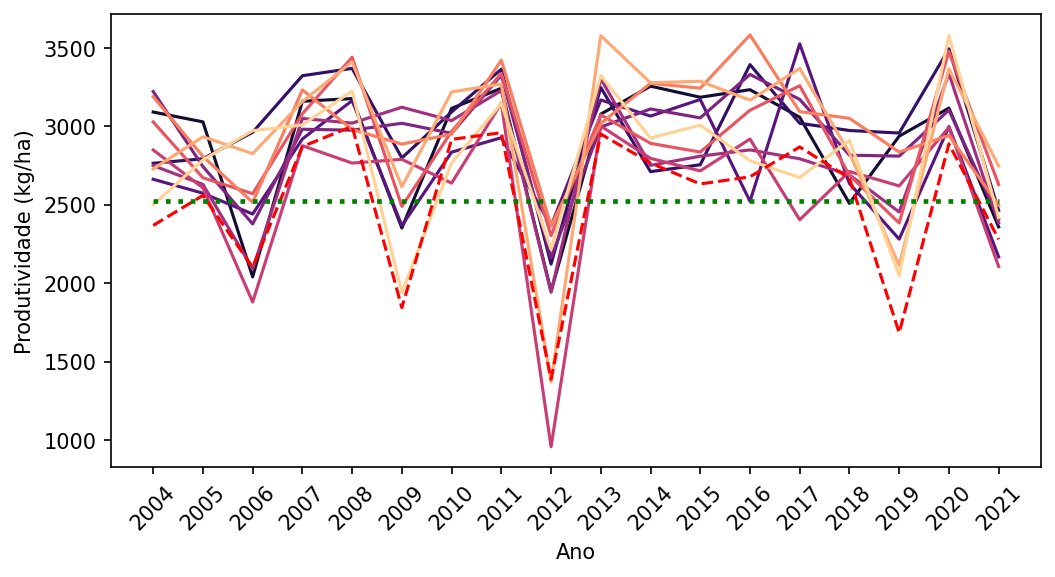

In [14]:
# criando um DF auxiliar
s_rend2 = pd.DataFrame(index = rend.columns[4:], columns = top10)
for i in top10:
  s_rend2[i] = rend_new[rend_new['name']==i].drop(['nivel','codigo_ibge',
                                                   'name','MEDIA'], 
                                                  axis = 1).iloc[0].values

# adicionando a média de todos os 50 municípios
s_rend2['Média']= rend_new.drop(['nivel','codigo_ibge','name','MEDIA'],
                                axis = 1).mean(axis = 0)

# criando uma paleta de cores
palette = itertools.cycle(sns.color_palette('magma', 10))

# gráfico dos municípios top 10 em rendimento (Figura 12)
fig, ax = plt.subplots(figsize = (8,4), dpi = 150)

for i in top10:
  c = next(palette)
  sns.lineplot(ax = ax, x = np.arange(2004,2022), y = s_rend2[i], color = c)

sns.lineplot(ax = ax, x=np.arange(2004,2022), y = s_rend2['Média'],
             linestyle = '--', color = 'red')
sns.regplot(x=np.arange(2004,2022), y=s_rend2['Média'].values, ci=None,
            scatter = False, 
            line_kws={'color': 'green', 'linestyle': 'dotted'})
ax.set_xlabel('Ano', fontsize = 10)
ax.set_ylabel('Produtividade (kg/ha)', fontsize = 10)
plt.xticks(np.arange(2004, 2022, 1.0))
plt.xticks(rotation=45)
plt.show()
# fig.savefig('top10_tend.png',bbox_inches='tight')

# Impacto do El Niño e da La Niña na produtividade

In [15]:
# intensidades e códigos de El Niño e La Niña
en = ['N','EL1','N','EL1','N','N','EL2','N','N',
      'N','N','EL1','EL4','N','N','EL1','N','N']
ln = ['N','N','LA1','N','LA3','LA1','N','LA3','LA2',
      'N','N','N','N','LA1','LA1','N','N','LA2']

prod_cidade = rend[rend.columns[4:]]

df_base = pd.DataFrame({'ano' : np.tile(np.arange(2004,2022),50)})
df_base['prod'] = np.zeros(df_base.shape[0])
df_base['EN'] = np.zeros(df_base.shape[0])
df_base['LN'] = np.zeros(df_base.shape[0])

for i in range(2004,2022):
  df_base.loc[df_base['ano']==i, 'prod'] = prod_cidade[str(i)].values

df_base['EN'] = np.tile(en, 50)
df_base['LN'] = np.tile(ln, 50)

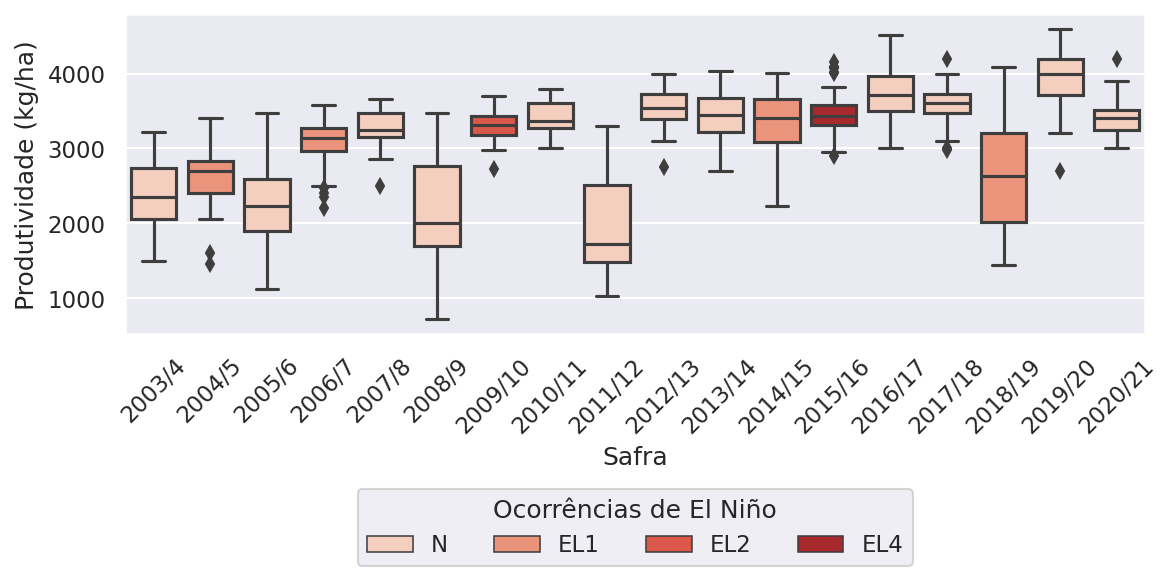

In [16]:
# ocorrências de El Niño vs produtividade (Figura 8)
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,4), dpi = 150)
sns.boxplot(ax = ax, x = 'ano', y = 'prod', data = df_base,
            hue = 'EN', palette = 'Reds', dodge = False,
            hue_order = ['N', 'EL1', 'EL2', 'EL4'])

ax.set_xticklabels([a_+'/'+b_ for a_, b_ in zip(np.arange(2003,
                                                          2021).astype(str),
                                                np.arange(4,
                                                          22).astype(str))])
ax.set_xlabel('Safra')
ax.set_ylabel('Produtividade (kg/ha)')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.45),
          fancybox=True, ncol=5, title = 'Ocorrências de El Niño')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# fig.savefig('elnino.png')

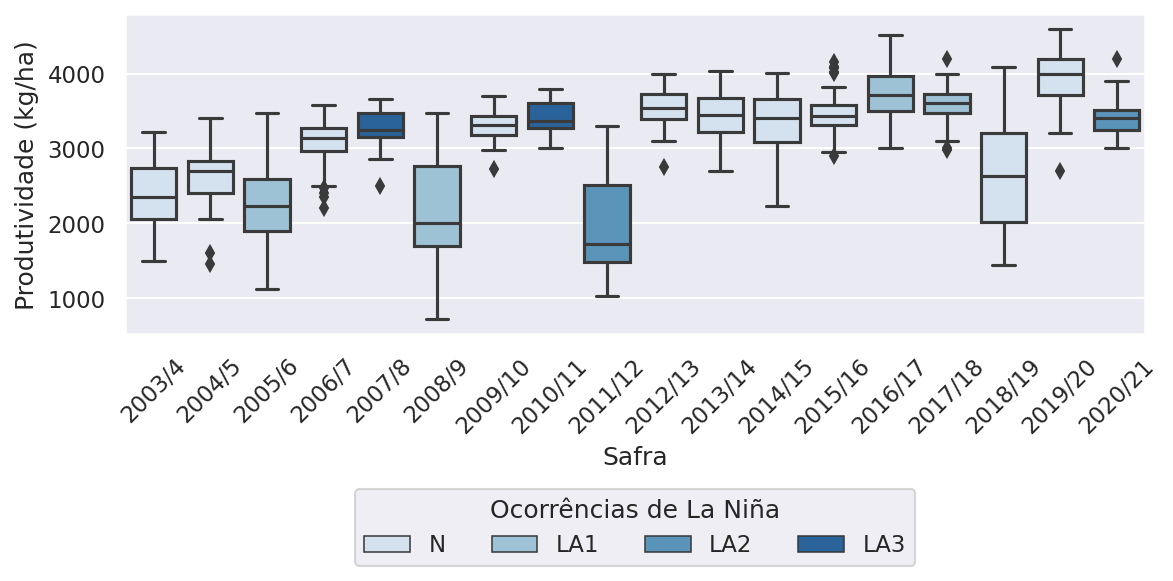

In [17]:
# ocorrências de La Niña vs produtividade (Figura 9)
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,4), dpi = 150)
sns.boxplot(ax = ax, x = 'ano', y = 'prod', data = df_base,
            hue = 'LN', palette = 'Blues', dodge = False,
            hue_order = ['N', 'LA1', 'LA2', 'LA3'])

ax.set_xticklabels([a_+'/'+b_ for a_, b_ in zip(np.arange(2003,
                                                          2021).astype(str),
                                                np.arange(4,
                                                          22).astype(str))])
ax.set_xlabel('Safra')
ax.set_ylabel('Produtividade (kg/ha)')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.45),
          fancybox=True, ncol=5, title = 'Ocorrências de La Niña')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# fig.savefig('lanina.png')

# Análise das séries preditoras

In [18]:
# Mapas de clima
clima_full = pd.read_csv(path+'agroclima.csv')
# Selecionando apenas os municípios do estudo
clima = clima_full[clima_full['codigo_ibge'].isin(codigos)]
# adicionando a temperatura mínima e máxima média por município no mapa
oeste_pr['TMIN_MED'] = clima.groupby('codigo_ibge').mean()['T2M_MIN'].values
oeste_pr['TMAX_MED'] = clima.groupby('codigo_ibge').mean()['T2M_MAX'].values
# adicionando a precipitação acumulada por município
oeste_pr['PREC_ACC'] = clima.groupby('codigo_ibge').sum()['PRECTOTCORR'].values

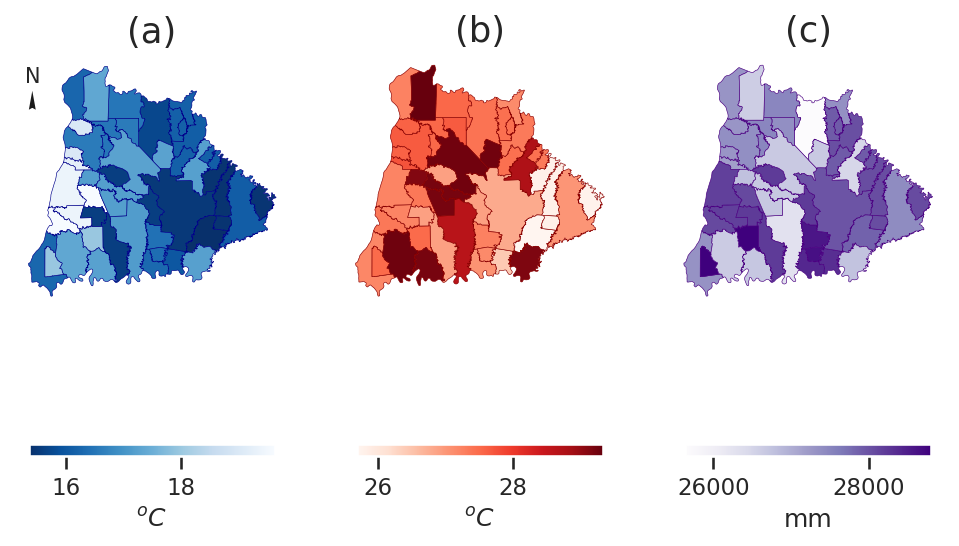

In [19]:
# Figura 3
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (8,8), dpi = 150)

oeste_pr.plot(ax = ax[0], column = 'TMIN_MED', legend = True,
              legend_kwds = {'label': '$^o C$','shrink':0.9, 
                             'orientation': 'horizontal'},
              cmap = 'Blues_r', edgecolor = 'darkblue', linewidth = 0.3)
ax[0].axis("off")
ax[0].set_title('(a)', fontsize = 17)
ax[0].text(x=-54.65, y=-24.1, s='N', fontsize=10)
ax[0].arrow(-54.59, -24.3, 0, 0.18, length_includes_head=True,
          head_width=0.08, head_length=0.2, overhang=.1, facecolor='k')

oeste_pr.plot(ax = ax[1], column = 'TMAX_MED', legend = True,
              legend_kwds = {'label': '$^o C$','shrink':0.9, 
                             'orientation': 'horizontal'},
              cmap = 'Reds', edgecolor = 'darkred', linewidth = 0.3)
ax[1].axis("off")
ax[1].set_title('(b)', fontsize = 17)

oeste_pr.plot(ax = ax[2], column = 'PREC_ACC', legend = True,
              legend_kwds = {'label': 'mm','shrink':0.9, 
                             'orientation': 'horizontal'},
              cmap = 'Purples', edgecolor = 'indigo', linewidth = 0.3)
ax[2].axis("off")
ax[2].set_title('(c)', fontsize = 17)
plt.show()
#fig.savefig('clima.png')

In [20]:
# convertendo os índices para o formato datetime
clima = clima.reset_index(drop = True)
clima.index = pd.to_datetime(clima['data'].astype(str), format='%Y%m%d')
# criando uma coluna com o ano do estudo
clima['data'] = clima.index
clima['ano'] = clima['data'].dt.year
# reorganizando colunas
clima = clima.iloc[:, [0,38]+np.arange(1,38).tolist()]
# dropando a coluna redundante 'data'
clima = clima.drop('data', axis = 1)
clima.head()

,ano,codigo_ibge,latitude,longitude,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,GWETROOT,GWETPROF,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
data,,,,,,,,,,,,,,,,,,,,,
2003-01-01,2003,4101051,-24.6449,-53.1332,7.99,26.27,23.23,24.83,30.21,22.21,...,0.75,0.77,27.77,31.76,42.93,151.07,169.98,20.33,0.63,3.31
2003-01-02,2003,4101051,-24.6449,-53.1332,6.47,25.70,23.36,24.59,29.33,22.86,...,0.75,0.77,24.21,31.01,42.91,132.70,167.05,18.12,0.56,2.95
2003-01-03,2003,4101051,-24.6449,-53.1332,6.27,24.75,22.78,23.78,28.03,21.76,...,0.76,0.77,19.60,30.05,42.89,110.20,163.97,15.33,0.48,2.49
2003-01-04,2003,4101051,-24.6449,-53.1332,6.38,24.50,22.21,23.29,27.82,21.44,...,0.79,0.79,17.09,29.50,42.86,96.17,158.87,13.24,0.43,2.23
2003-01-05,2003,4101051,-24.6449,-53.1332,8.43,25.62,22.50,23.95,29.68,21.24,...,0.80,0.80,24.76,30.89,42.83,134.60,165.02,18.11,0.56,2.94


In [21]:
# Adicionando colunas para receber os dados de NDVI e Evapotranspiração
clima['NDVI'] = np.zeros(clima.shape[0])
clima['EVT'] = np.zeros(clima.shape[0])
# adicionando os valores de NDVI e Evapotranspiração
for i in codigos:
  ne = pd.read_csv(path+'NDVI_EVT/'+str(i)+'.csv', decimal = ',', sep = ';', 
                   skiprows = 1, header = None)
  clima.loc[clima['codigo_ibge'] == i, 'NDVI'] = ne[ne.columns[1]].values
  clima.loc[clima['codigo_ibge'] == i, 'EVT'] = ne[ne.columns[2]].values
# substituindo NDVI menor que 0 por zero (locais com rios)
clima.loc[clima['NDVI']<0, 'NDVI'] = 0
# checando a integridade dos dados
clima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328750 entries, 2003-01-01 to 2020-12-31
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano                  328750 non-null  int64  
 1   codigo_ibge          328750 non-null  int64  
 2   latitude             328750 non-null  float64
 3   longitude            328750 non-null  float64
 4   T2M_RANGE            328750 non-null  float64
 5   TS                   328750 non-null  float64
 6   T2MDEW               328750 non-null  float64
 7   T2MWET               328750 non-null  float64
 8   T2M_MAX              328750 non-null  float64
 9   T2M_MIN              328750 non-null  float64
 10  T2M                  328750 non-null  float64
 11  QV2M                 328750 non-null  float64
 12  RH2M                 328750 non-null  float64
 13  PRECTOTCORR          328750 non-null  float64
 14  PS                   328750 non-null  float64
 15  W

In [22]:
def filtrar_cidade(cod, ano):
  '''
  função para filtrar atributos de uma cidade em um determinado ano (ou todos)
  '''
  aux = clima.loc[clima['codigo_ibge'] == cod]
  if ano == 0:
    return aux
  else:
    return aux[aux['ano'] == ano][aux.columns[4:]]

# Filtrando para os meses de interesse (01-set a 31-dez)

In [23]:
def filtrar_clima(cod):
  '''
  função para filtrar séries das cidades no período de interesse
  '''
  cidade = filtrar_cidade(cod, 0).loc[str(2003)+'-09-01' :
                                      str(2003)+'-12-31'].drop('ano', axis = 1)
  cidade.insert(0,'safra',0)
  cidade['safra'] = np.repeat(2004, cidade.shape[0])

  for i in np.arange(2004,2021):
    ano = i
    aux = filtrar_cidade(cod, 0).loc[str(i)+'-09-01' : 
                                     str(i)+'-12-31'].drop('ano', axis = 1)
    aux.insert(0,'safra',0)
    aux['safra'] = np.repeat(i+1, aux.shape[0])
    cidade = pd.concat((cidade, aux), axis = 0)
  return cidade

In [24]:
def geo_evolve(variavel):
  '''
  função para gerar um geo DataFrame com as médias das variáveis entre
  Setembro e Dezembro
  '''
  df = pd.DataFrame(np.zeros((oeste_pr.shape[0],4)), 
                    columns = [variavel+'_SET', variavel+'_OUT', 
                               variavel+'_NOV', variavel+'_DEZ'])
  colunas = df.columns.values
  for i in range(50):
    aux = filtrar_clima(codigos[i])
    mn = []
    for j in range(9,13):
      mn.append(
          aux.loc[aux.index.month == j].groupby('safra').mean()[variavel].mean()
          )
    df.iloc[i] = mn

  oeste2 = oeste_pr.copy()
  oeste2 = oeste2.reset_index()
  oeste2[colunas] = df[colunas]
  return oeste2

# Evolução do NDVI (médias dos meses de setembro a dezembro)

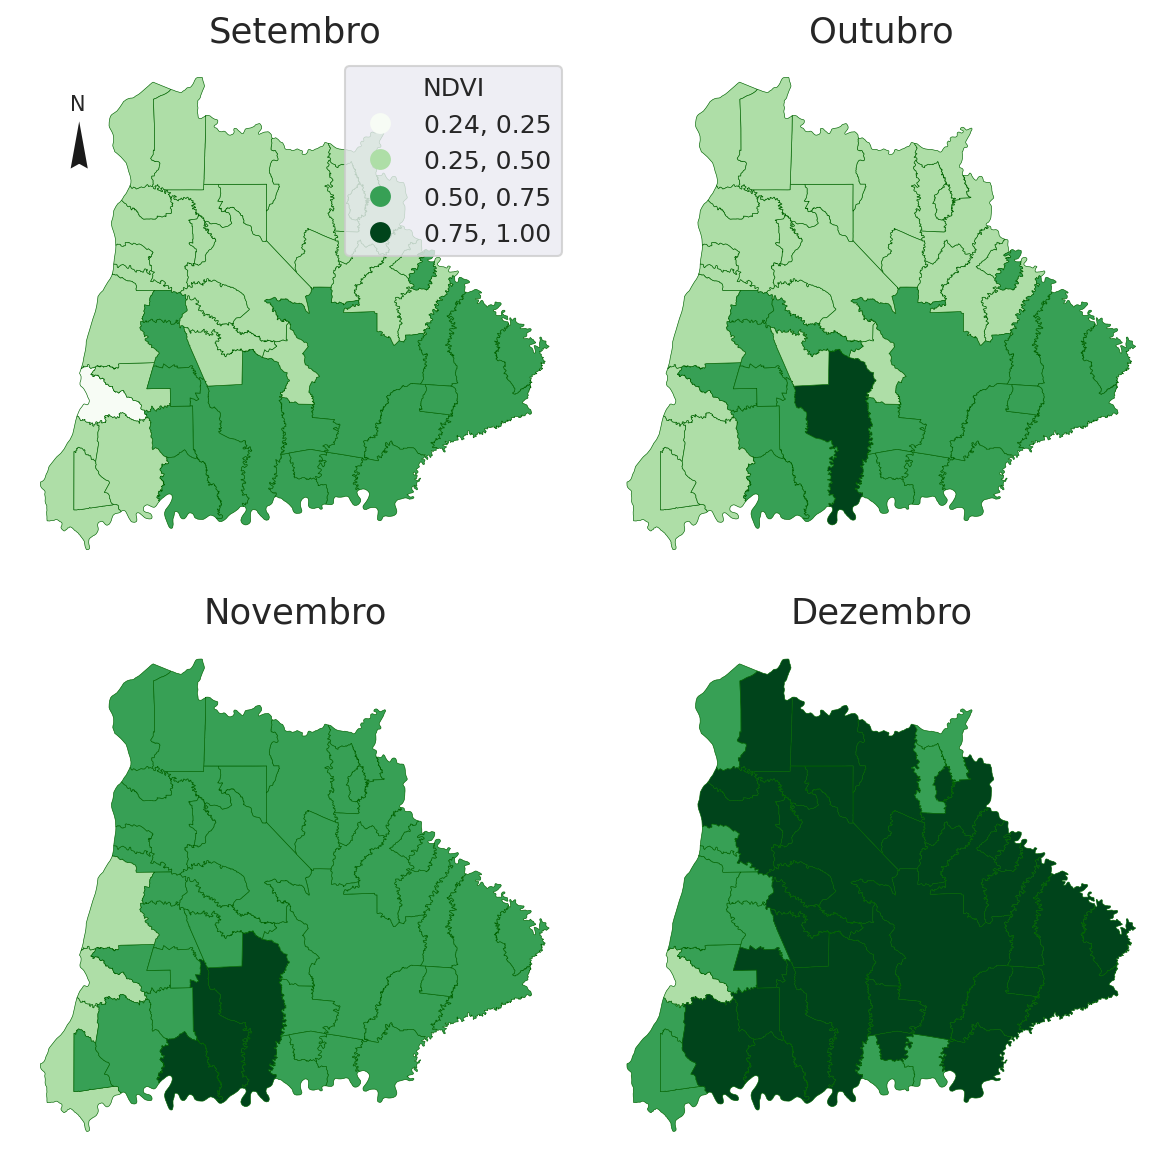

In [25]:
# obtendo os resumos
oeste2 = geo_evolve('NDVI')

# gráfico espacial (Figura 7)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols = 2, sharey = True, 
                                          figsize = (8,8), dpi = 150)

g1 = oeste2.plot(ax = ax1, column = 'NDVI_SET', legend = True, 
                 scheme = 'user_defined',
                 classification_kwds = dict(bins=[0.25,0.50,0.75,1]),
                 legend_kwds = {'loc': 'upper right','fontsize': 12, 
                                'title': 'NDVI'},
                 cmap = 'Greens', edgecolor = 'darkgreen', linewidth = 0.3)

g2 = oeste2.plot(ax = ax2, column = 'NDVI_OUT', legend = False, 
                 scheme = 'user_defined',
                 classification_kwds = dict(bins=[0.25,0.50,0.75,1]),
                 cmap = 'Greens', edgecolor = 'darkgreen', linewidth = 0.3)

g3 = oeste2.plot(ax = ax3, column = 'NDVI_NOV', legend = False, 
                 scheme = 'user_defined',
                 classification_kwds = dict(bins=[0.25,0.50,0.75,1]),
                 cmap = 'Greens', edgecolor = 'darkgreen', linewidth = 0.3)

g4 = oeste2.plot(ax = ax4, column = 'NDVI_DEZ', legend = False, 
                 scheme = 'user_defined',
                 classification_kwds = dict(bins=[0.25,0.50,0.75,1]),
                 cmap = 'Greens', edgecolor = 'darkgreen', linewidth = 0.3)

ax1.axis("off")
ax1.set_title('Setembro', fontsize = 17)
ax1.text(x=-54.5, y=-24.1, s='N', fontsize=10)
ax1.arrow(-54.465, -24.3, 0, 0.18, length_includes_head=True,
          head_width=0.08, head_length=0.2, overhang=.1, facecolor='k')

ax2.axis("off")
ax2.set_title('Outubro', fontsize = 17)

ax3.axis("off")
ax3.set_title('Novembro', fontsize = 17)

ax4.axis("off")
ax4.set_title('Dezembro', fontsize = 17)

fig = plt.gcf()
plt.tight_layout()
plt.show()
#fig.savefig('ndvi1.png')

# Evolução das demais variáveis (médias dos meses de setembro a dezembro)

In [26]:
# função para gerar os gráficos
def graph_evolve(variavel, colormap, cedge, legend, legend_pos):
  oeste2 = geo_evolve(variavel)
  bs = np.round(np.quantile(oeste2[oeste2.columns[-4:]], [0.25,0.5,0.75,1]),2)

  fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols = 2, sharey = True, 
                                            figsize = (8,8), dpi = 150)

  g1 = oeste2.plot(ax = ax1, column = variavel+'_SET', legend = True, 
                   scheme = 'user_defined',
                   classification_kwds = dict(bins=bs),
                   legend_kwds = {'loc': legend_pos,'fontsize': 12,
                                  'title': legend},
                   cmap = str(colormap), edgecolor = str(cedge), 
                   linewidth = 0.3)

  g2 = oeste2.plot(ax = ax2, column = variavel+'_OUT', legend = False, 
                   scheme = 'user_defined',
                   classification_kwds = dict(bins=bs),
                   cmap = str(colormap), edgecolor = str(cedge), 
                   linewidth = 0.3)

  g3 = oeste2.plot(ax = ax3, column = variavel+'_NOV', legend = False, 
                   scheme = 'user_defined',
                   classification_kwds = dict(bins=bs),
                   cmap = str(colormap), edgecolor = str(cedge), 
                   linewidth = 0.3)

  g4 = oeste2.plot(ax = ax4, column = variavel+'_DEZ', legend = False, 
                   scheme = 'user_defined',
                   classification_kwds = dict(bins=bs),
                   cmap = str(colormap), edgecolor = str(cedge), 
                   linewidth = 0.3)

  ax1.axis("off")
  ax1.set_title('Setembro', fontsize = 17)
  ax1.text(x=-54.5, y=-24.1, s='N', fontsize=10)
  ax1.arrow(-54.465, -24.3, 0, 0.18, length_includes_head=True,
            head_width=0.08, head_length=0.2, overhang=.1, facecolor='k')

  ax2.axis("off")
  ax2.set_title('Outubro', fontsize = 17)

  ax3.axis("off")
  ax3.set_title('Novembro', fontsize = 17)

  ax4.axis("off")
  ax4.set_title('Dezembro', fontsize = 17)

  fig = plt.gcf()
  plt.tight_layout()
  return fig

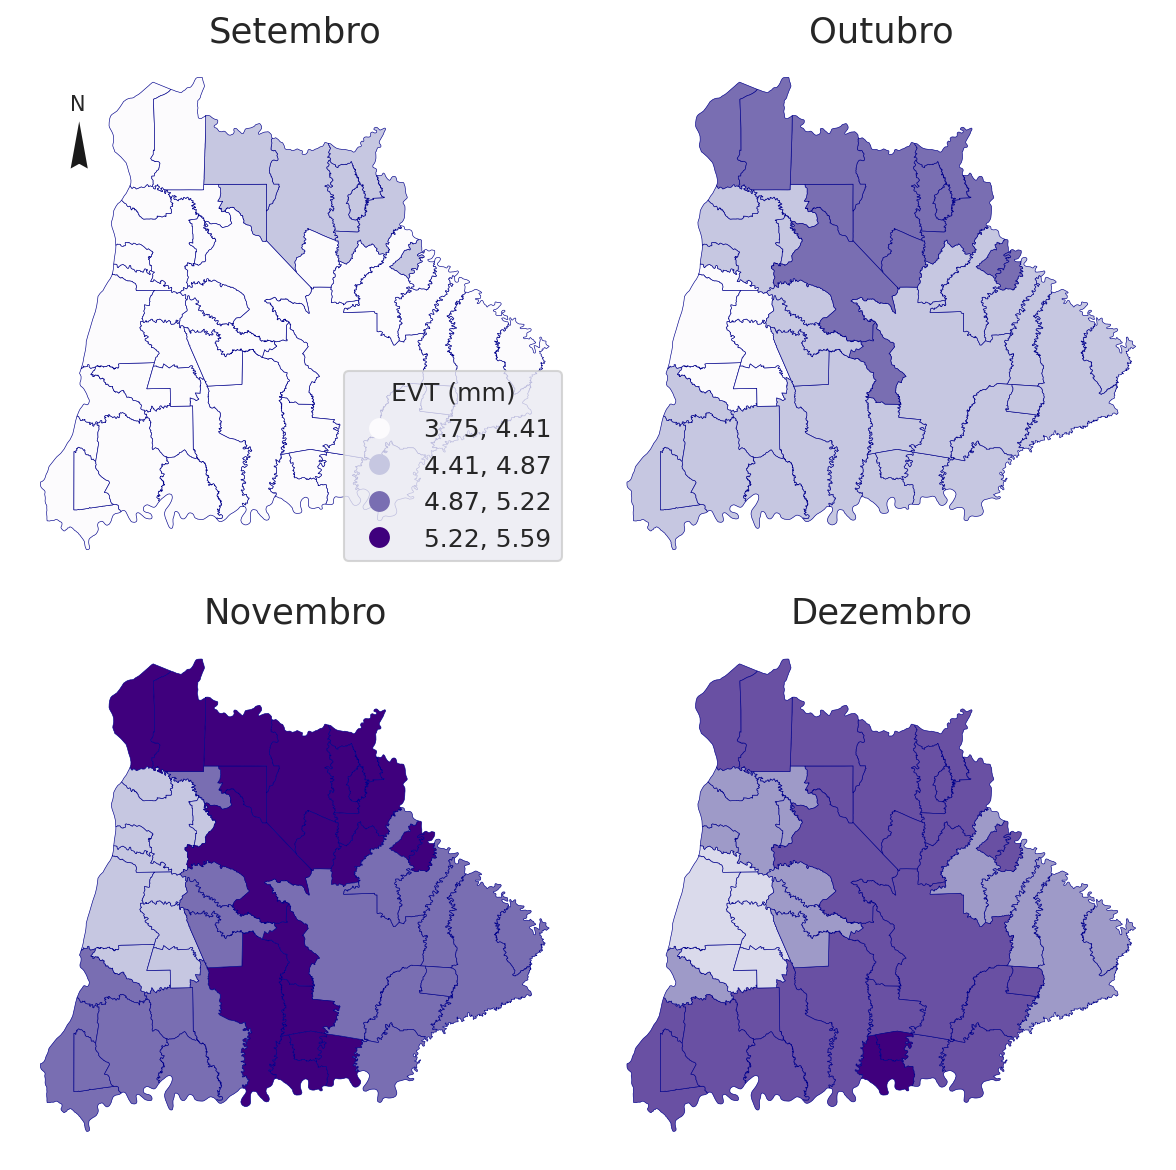

In [27]:
# evolução da evapotranspiração (Figura 5)
fig = graph_evolve('EVT', 'Purples', 'darkblue', 'EVT (mm)', 'lower right')
#fig.savefig('evt1.png')

# Analisando as séries de:
- Corbélia (1ª posição em produtividade - 1/50);
- Ibema (17ª posição - 17/50);
- Nova Santa Rosa (33ª posição - 33/50);
- Mercedes (úlitima posição - 50/50).

In [28]:
corb = filtrar_clima(codigos[10])
ibem = filtrar_clima(codigos[18])
nova = filtrar_clima(codigos[31])
merc = filtrar_clima(codigos[28])

# Correlações entre séries agroclimáticas (pré-seleção de covariáveis)

In [29]:
# colunas de cada classe de variáveis
temps = ['T2M_RANGE','T2M','T2M_MIN','T2M_MAX','T2MDEW','T2MWET','TS']
umids = ['QV2M', 'RH2M', 'PRECTOTCORR', 'EVT']
winds = ['WS2M_RANGE','WS10M_RANGE','WS50M_RANGE',
         'WS2M','WS10M','WS50M',
         'WS2M_MIN','WS10M_MIN','WS50M_MIN',
         'WS2M_MAX','WS10M_MAX','WS50M_MAX',
         'PS']
solos = ['GWETTOP','GWETROOT','GWETPROF']
eners = ['ALLSKY_SFC_SW_DWN','CLRSKY_SFC_SW_DWN','TOA_SW_DWN',
         'ALLSKY_SFC_PAR_TOT','CLRSKY_SFC_PAR_TOT','ALLSKY_SFC_UVA',
         'ALLSKY_SFC_UVB']

In [30]:
# estudo de correlação entre atributos que permaneceram na base
atrib = ['T2M_RANGE', 'T2M_MIN', 'T2M_MAX', 
         'QV2M', 'RH2M', 'PRECTOTCORR', 'EVT',
         'WS10M_RANGE','WS50M_RANGE','WS50M_MIN','WS2M_MAX','WS50M_MAX','PS',
         'GWETTOP',
         'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA',
         'NDVI']

In [31]:
# base final de atributos
atrib = ['T2M_RANGE', 'T2M_MIN', 
         'PRECTOTCORR', 'EVT',
         'WS10M_RANGE','WS50M_RANGE','WS50M_MIN','WS2M_MAX','WS50M_MAX','PS',
         'GWETTOP',
         'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA',
         'NDVI']

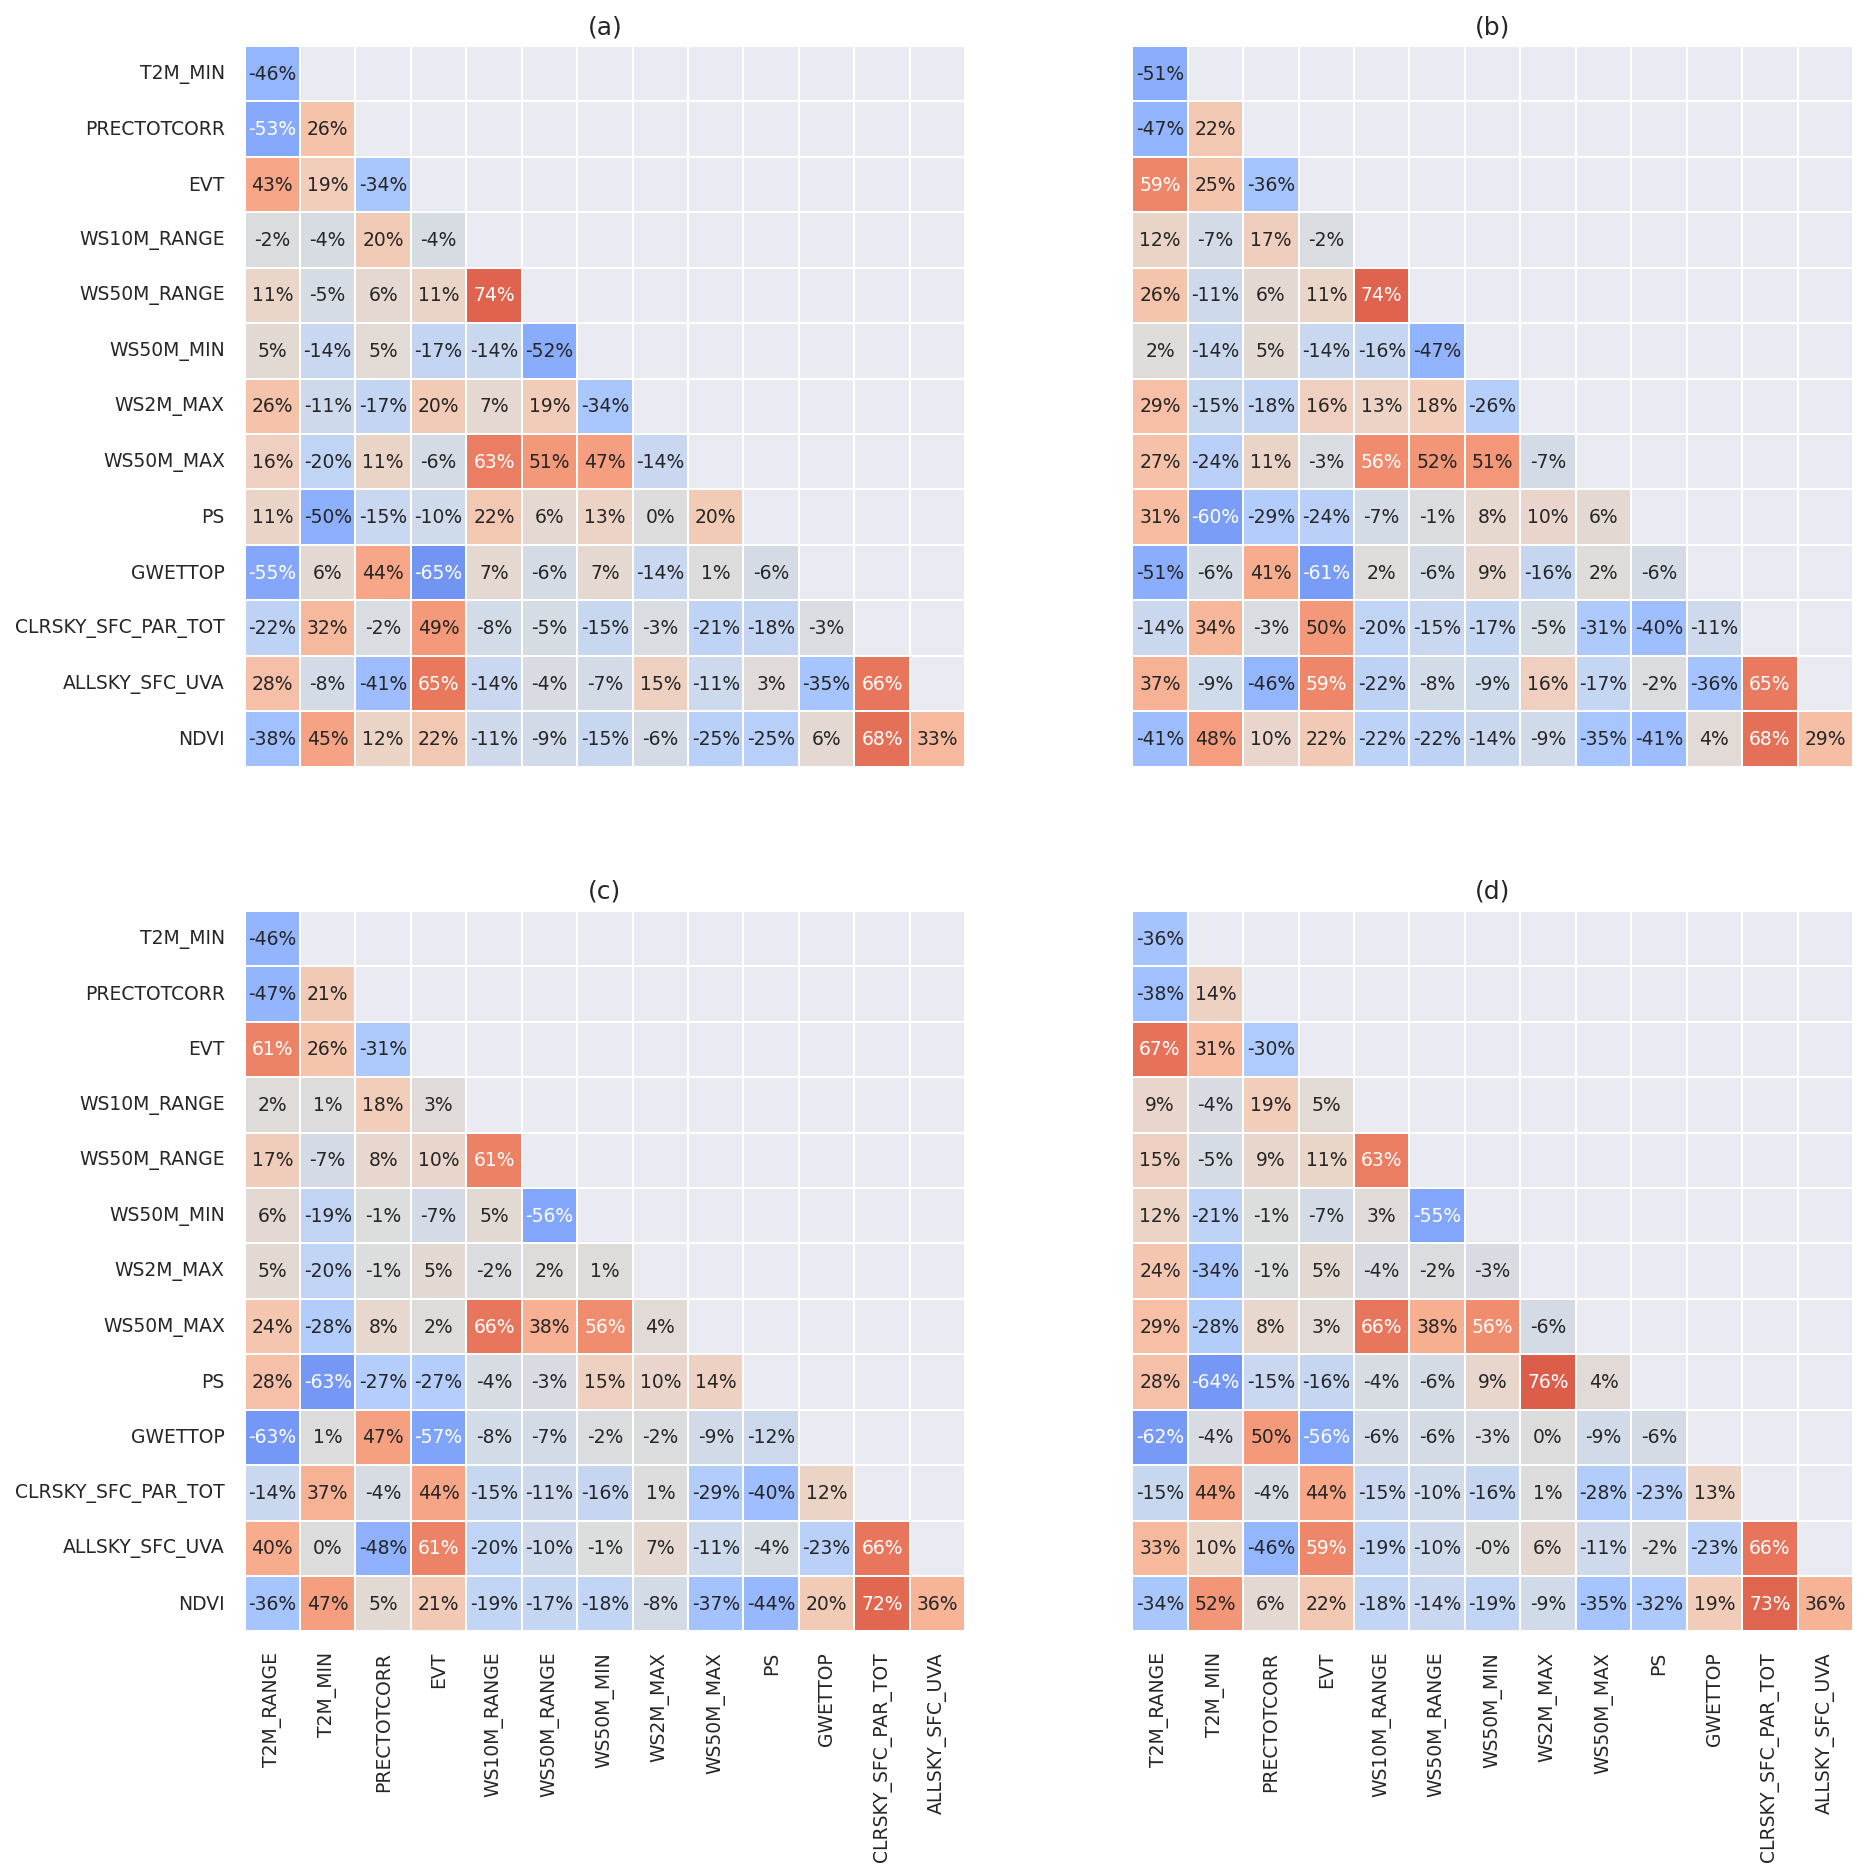

In [32]:
# mapas de calor para atributos selecionados (Figura 23 e demais)
feats = atrib # trocar de acordo com os atributos a serem analizados
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols = 2, 
                                          sharey = True, figsize = (14,14),
                                          dpi=150)


aux = corb[feats].corr()
aux2 = aux.drop(aux.columns[0], axis = 0).drop(aux.columns[len(feats)-1], 
                                               axis = 1)
g1 = sns.heatmap(aux2, linewidth = 0.1, annot = True, vmin=-1, vmax=1, 
                 cmap = 'coolwarm', square = True, mask = np.triu(aux)[1:,:-1], 
                 cbar = False, fmt = '.0%', ax = ax1,
                 annot_kws = {'fontsize':9})

aux = ibem[feats].corr()
aux2 = aux.drop(aux.columns[0], axis = 0).drop(aux.columns[len(feats)-1], 
                                               axis = 1)
g2 = sns.heatmap(aux2, linewidth = 0.1, annot = True, vmin=-1, vmax=1, 
                 cmap = 'coolwarm', square = True, mask = np.triu(aux)[1:,:-1], 
                 cbar = False, fmt = '.0%', ax = ax2,
                 annot_kws = {'fontsize':9})

aux = nova[feats].corr()
aux2 = aux.drop(aux.columns[0], axis = 0).drop(aux.columns[len(feats)-1], 
                                               axis = 1)
g3 = sns.heatmap(aux2, linewidth = 0.1, annot = True, vmin=-1, vmax=1, 
                 cmap = 'coolwarm', square = True, mask = np.triu(aux)[1:,:-1], 
                 cbar = False, fmt = '.0%', ax = ax3,
                 annot_kws = {'fontsize':9})

aux = merc[feats].corr()
aux2 = aux.drop(aux.columns[0], axis = 0).drop(aux.columns[len(feats)-1], 
                                               axis = 1)
g4 = sns.heatmap(aux2, linewidth = 0.1, annot = True, vmin=-1, vmax=1, 
                 cmap = 'coolwarm', square = True, mask = np.triu(aux)[1:,:-1], 
                 cbar = False, fmt = '.0%', ax = ax4,
                 annot_kws = {'fontsize':9})


g1.set(xticklabels=[], title = '(a)')
g1.tick_params(left = False, bottom=False, labelsize = 9)
g2.set(xticklabels=[], title = '(b)')
g2.tick_params(left = False, bottom=False, labelsize = 9)
g3.set(title = '(c)')
g3.tick_params(left = False, bottom=False, labelsize = 9)
g4.set(title = '(d)')
g4.tick_params(left = False, bottom=False, labelsize = 9)

plt.show()
#fig.savefig('final_corr.png', bbox_inches = 'tight')

# Analisando a relação entre a produtividade e séries agroclimáticas por meio de correlações cruzadas.

Pode revelar correlações em lags maiores.

In [33]:
x1 = corb['NDVI'].resample('Y').median().values
x2 = corb['PRECTOTCORR'].resample('Y').median().values
x3 = corb['EVT'].resample('Y').median().values
x4 = corb['T2M_RANGE'].resample('Y').median().values

y = rend_city(rend_new, 'Corbélia')

cct1 = sm.tsa.stattools.ccf(x1, y, adjusted=False)
cct2 = sm.tsa.stattools.ccf(x2, y, adjusted=False)
cct3 = sm.tsa.stattools.ccf(x3, y, adjusted=False)
cct4 = sm.tsa.stattools.ccf(x4, y, adjusted=False)

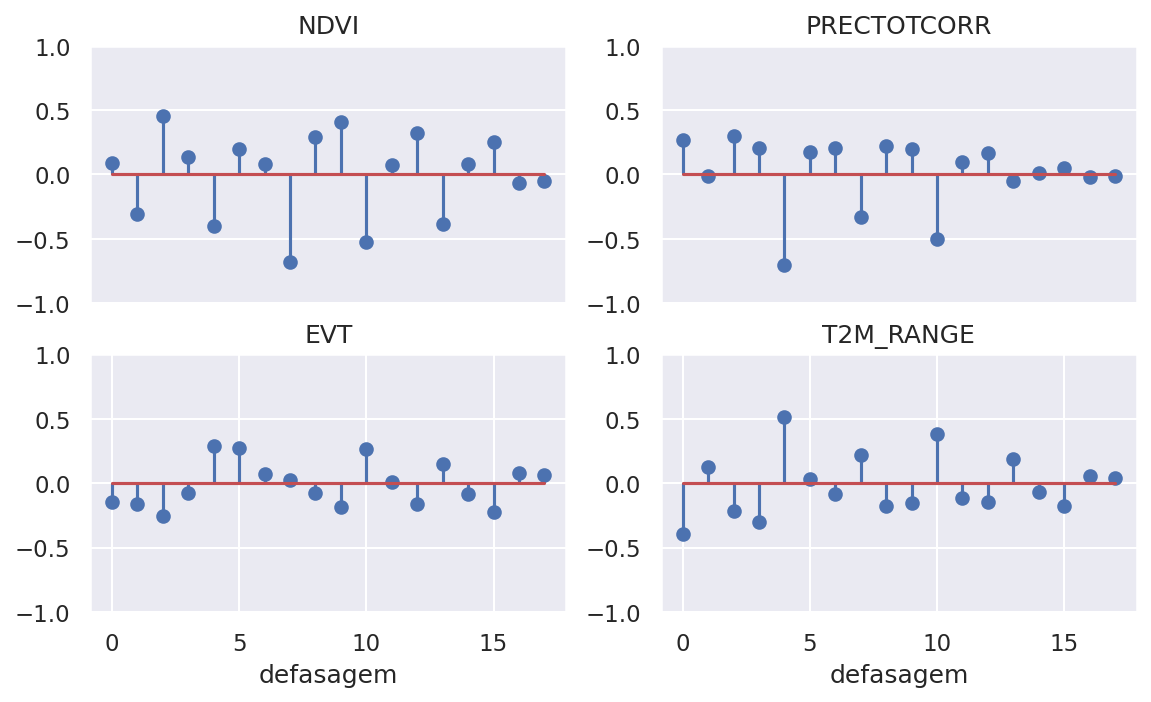

In [34]:
# gráfico de correlações cruzadas (Figura 24)
fig, ax = plt.subplots(2, 2, figsize = (9,5), dpi = 150)

ax[0,0].stem(range(0,18), cct1)
ax[0,0].set_title('NDVI')
ax[0,0].set_xticks([])
ax[0,1].stem(range(0,18), cct2)
ax[0,1].set_title('PRECTOTCORR')
ax[0,1].set_xticks([])
ax[1,0].stem(range(0,18), cct3)
ax[1,0].set_title('EVT')
ax[1,0].set_xlabel('defasagem')
ax[1,1].stem(range(0,18), cct4)
ax[1,1].set_title('T2M_RANGE')
ax[1,1].set_xlabel('defasagem')

for a in ax.flat:
    a.set(ylim = (-1,1))

plt.show()

# fig.savefig('cross_corr.png')

# Salvando os dados e imprimindo notebook

In [35]:
# # dropando features não utilizáveis
# clima = clima.drop(['ano', 'latitude', 'longitude'], axis = 1)

# # filtrando features no intervalo de estudo
# clima = clima.loc[clima.index.month.isin(range(9,13))]
# atrib.append('codigo_ibge')
# clima = clima[atrib]
# clima.to_csv(path+'clima_final.csv')

# rend_new = rend_new.drop('MEDIA', axis = 1)
# rend_new.to_csv(path+'rend_new.csv')

In [36]:
# %%capture
# !sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [37]:
# %%capture
# !jupyter nbconvert --to pdf /content/data_preparation.ipynb